In [1]:
from FIS3 import FIS3
import concurrent.futures
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import osmnx as ox
import networkx as nx
import requests
import json
from scipy.optimize import curve_fit
from urllib.parse import urljoin
import numpy as np
# import fuzzy logic 
import skfuzzy as fuzz
import skfuzzy.membership as mf
import mm_utils
# for plotting 
import matplotlib.pyplot as plt

In [17]:
# for testing purposes 
# first input in imp 
# speed, HE, PD, hdop, conn, dist_err]
data_temp = [23.08095, 180.251, 1.981915, 0.8, 1, 224.3661]
data_temp2 = [23.08095, 180.251, 1.981915, 1, 224.3661]



In [42]:
def build_matrix(rule_1 = 1, 
                 rule_2 = 1, 
                 rule_3 = 1, 
                 rule_4 = 1, 
                 rule_5 = 1,
                 rule_6 = 1, 
                 rule_7 = 1, 
                 rule_8 = 1,
                 rule_9 = 1,
                 rule_10 = 1):
    # Rule 1: Speed high HE small, 
    # Rule 2: Speed high HE large
    # Rule 3: HDOP good PD short
    # Rule 4: HDOP good PD long
    # Rule 5: PD short HE small
    # Rule 6: PD long HE large
    # Rule 7: not connect
    # Rule 8: connect
    # Rule 9: DE Small
    # Rule 10: DE Large

    wt_array = np.ones((1,10))
    wt_array[0,0] = rule_1
    wt_array[0,1] = rule_2
    wt_array[0,2] = rule_3
    wt_array[0,3] = rule_4
    wt_array[0,4] = rule_5
    wt_array[0,5] = rule_6
    wt_array[0,6] = rule_7
    wt_array[0,7] = rule_8
    wt_array[0,8] = rule_9
    wt_array[0,9] = rule_10

    wt_array_std = wt_array/ wt_array.sum() * 10 
    wt_matrix = np.diag(wt_array_std[0])
    
    return wt_matrix

correct dimension


C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))


61.366021291681825

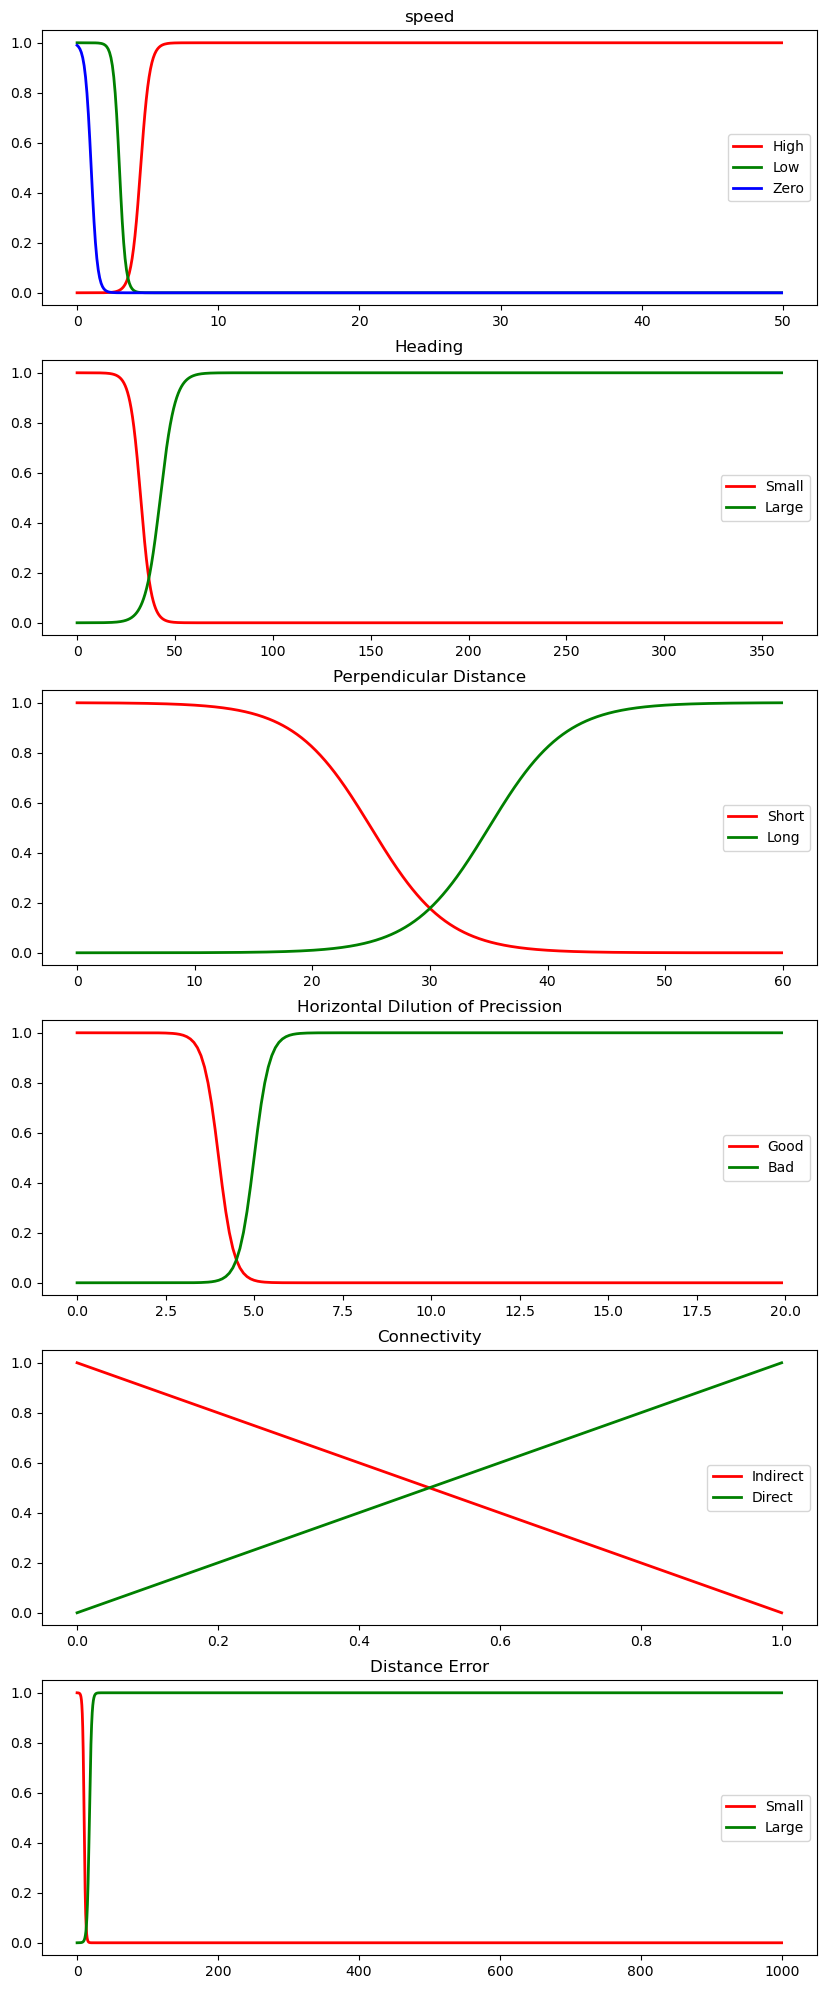

In [44]:
wt_matrix = build_matrix()
FIS3(data_temp, method = 1, wt_matrix = wt_matrix, plot = True)

In [41]:
np.diag(wt_matrix)

array([0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 1.81818182, 0.90909091, 0.90909091, 0.90909091])

correct dimension


C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))


42.49771896260221

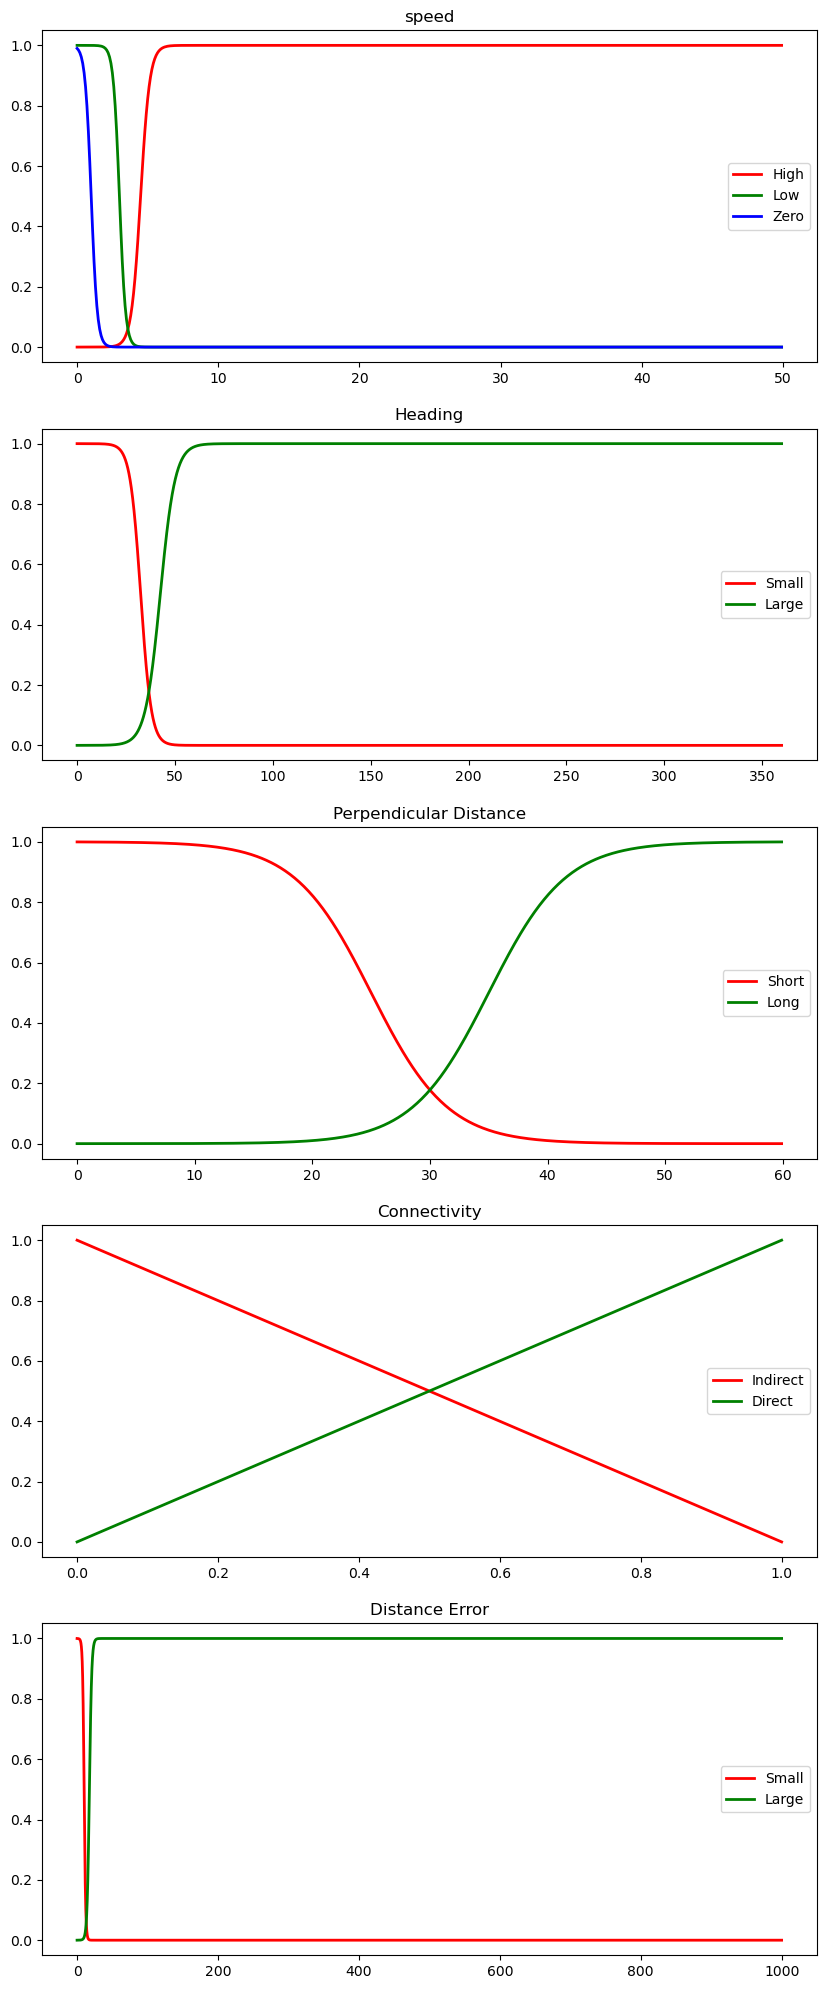

In [5]:
FIS3(data_temp2, method = 2, plot = True)

# Debugging the Code

In [27]:
import concurrent.futures
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import osmnx as ox
import networkx as nx
import requests
import json
from scipy.optimize import curve_fit
from urllib.parse import urljoin
import numpy as np
# import fuzzy logic 
import skfuzzy as fuzz
import skfuzzy.membership as mf
import mm_utils
# for plotting 
import matplotlib.pyplot as plt

In [28]:
def get_params(l, r, shape="s"):
    shape = shape.lower()
    if shape == "s":
        y = np.array([0.01, 0.5, 0.99])
    else:
        y = np.array([0.99, 0.5, 0.01])

    x = np.array([l, (l + r) / 2, r])
    slope = 1 / (r - l)

    def logistic_func(x, a, b, c):
        return a / (1 + np.exp(-b * (x - c)))

    p0 = [1, slope, (l + r) / 2]
    params, _ = curve_fit(logistic_func, x, y, p0=p0)

    return params[1]

def get_mid(bounds, row):
    return (bounds.iloc[row, 0] + bounds.iloc[row, 1]) / 2

def init_vars():
    left_bounds = [3, 2, 0, 20, 25, 10, 20, 3, 4, 85, 90, 85, 90, -5, -5, 10, 15, 150, 0, 0, 5, 10]
    right_bounds = [6, 4, 2, 45, 60, 40, 50, 5, 6, 100, 120, 100, 120, 5, 10, 20, 30, 200, 1, 1, 15, 25]
    data = {"left_bounds": left_bounds, "right_bounds": right_bounds}
    df = pd.DataFrame(data, index=["speed_high", "speed_low", "speed_zero", "HE_small",
                                   "HE_large", "PD_short", "PD_long", "HDOP_good",
                                   "HDOP_bad", "alpha_low", "alpha_high", "beta_low", "beta_high",
                                   "delta_dist_neg", "delta_dist_pos",
                                   "HI_small", "HI_large", "HI_180", "connectivity_direct",
                                   "connectivity_indirect", "dist_err_small", "dist_err_large"])
    df["ID"] = range(1, len(df) + 1)
    return df

In [29]:
var_bounds = init_vars()
#print(var_bounds.iloc[0,0])
get_mid(var_bounds,0)
m = np.empty((2, 11))
m[:] = np.nan

# assign each element
# Speed high
m[0, 0] = get_params(var_bounds.iloc[0, 0], var_bounds.iloc[0, 1], "s")
m[1, 0] = get_mid(var_bounds, 0)

# speed low
m[0, 1] = get_params(var_bounds.iloc[1, 0], var_bounds.iloc[1, 1], "z")
m[1, 1] = get_mid(var_bounds, 1)

# speed zero
m[0, 2] = get_params(var_bounds.iloc[2, 0], var_bounds.iloc[2, 1], "z")
m[1, 2] = get_mid(var_bounds, 2)

# HE small
m[0, 3] = get_params(var_bounds.iloc[3, 0], var_bounds.iloc[3, 1], "z")
m[1, 3] = get_mid(var_bounds, 3)

#HE large
m[0, 4] = get_params(var_bounds.iloc[4, 0], var_bounds.iloc[4, 1], "s")
m[1, 4] = get_mid(var_bounds, 4)

# PD short
m[0, 5] = get_params(var_bounds.iloc[5, 0], var_bounds.iloc[5, 1], "z")
m[1, 5] = get_mid(var_bounds, 5)

# PD long
m[0, 6] = get_params(var_bounds.iloc[6, 0], var_bounds.iloc[6, 1], "s")
m[1, 6] = get_mid(var_bounds, 6)

# HDOP good
m[0, 7] = get_params(var_bounds.iloc[7, 0], var_bounds.iloc[7, 1], "z")
m[1, 7] = get_mid(var_bounds, 7)

# HDOP bad
m[0, 8] = get_params(var_bounds.iloc[8, 0], var_bounds.iloc[8, 1], "s")
m[1, 8] = get_mid(var_bounds, 8)

#dist_err_small 
m[0, 9] = get_params(var_bounds.iloc[20, 0], var_bounds.iloc[20, 1], "z")
m[1, 9] = get_mid(var_bounds, 20)

#dist_err_large 
m[0, 10] = get_params(var_bounds.iloc[21, 0], var_bounds.iloc[21, 1], "s")
m[1, 10] = get_mid(var_bounds, 21)

# define range for each input 
x_speed = np.arange(0, 50, 0.1)
x_HE = np.arange(0, 360, 0.1)
x_PD = np.arange(0, 60, 0.1)
x_HDOP = np.arange(0, 20, 0.1)
x_DE = np.arange(0, 1000, 0.1)
x_connect = np.arange(0, 1.1, 0.1)




C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [30]:
# Creating Membership function : 
#input : range, x shift, width, 
# note : parameter input is flipped from R function 
speed_high = mf.sigmf(x_speed, m[1, 0], m[0, 0])
speed_low = mf.sigmf(x_speed, m[1, 1], m[0, 1])
speed_zero = mf.sigmf(x_speed, m[1,2], m[0,2])

HE_small = mf.sigmf(x_HE, m[1, 3], m[0, 3])
HE_large = mf.sigmf(x_HE, m[1, 4], m[0, 4])

PD_short = mf.sigmf(x_PD, m[1, 5], m[0, 5])
PD_long = mf.sigmf(x_PD, m[1, 6], m[0, 6])

HDOP_good = mf.sigmf(x_HDOP, m[1, 7], m[0, 7])
HDOP_bad = mf.sigmf(x_HDOP, m[1, 8], m[0, 8])

DE_small = mf.sigmf(x_DE, m[1, 9], m[0, 9])
DE_large = mf.sigmf(x_DE, m[1, 10], m[0, 10])

ind_connect = mf.trimf(x_connect, [-1, 0, 1])
dir_connect = mf.trimf(x_connect, [0, 1, 2])

C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))


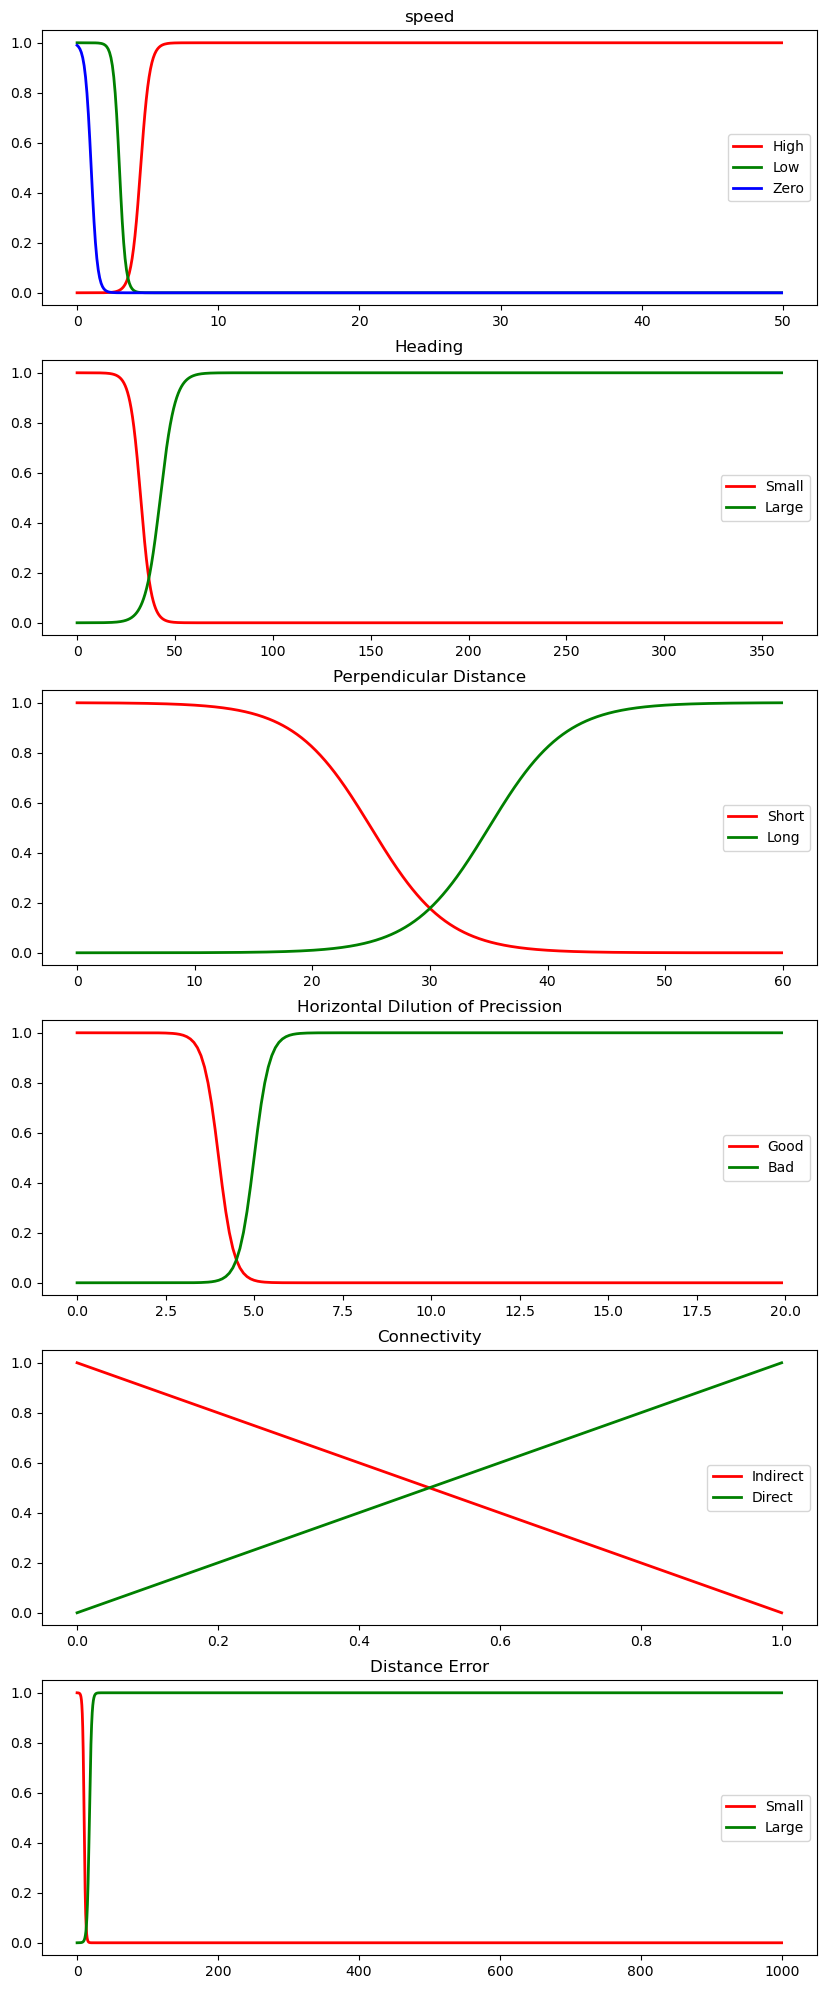

In [31]:
plot = True
if plot == True:
    # plot membership function 
    fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 6, figsize =(10, 25))

    ax0.plot(x_speed, speed_high, 'r', linewidth = 2, label = 'High')
    ax0.plot(x_speed, speed_low, 'g', linewidth = 2, label = 'Low')
    ax0.plot(x_speed, speed_zero, 'b', linewidth = 2, label = 'Zero')
    ax0.set_title('speed')
    ax0.legend()


    ax1.plot(x_HE, HE_small, 'r', linewidth = 2, label = 'Small')
    ax1.plot(x_HE, HE_large, 'g', linewidth = 2, label = 'Large')
    ax1.set_title('Heading')
    ax1.legend()

    ax2.plot(x_PD, PD_short, 'r', linewidth = 2, label = 'Short')
    ax2.plot(x_PD, PD_long, 'g', linewidth = 2, label = 'Long')
    ax2.set_title('Perpendicular Distance')
    ax2.legend()

    ax3.plot(x_HDOP, HDOP_good, 'r', linewidth = 2, label = 'Good')
    ax3.plot(x_HDOP, HDOP_bad, 'g', linewidth = 2, label = 'Bad')
    ax3.set_title('Horizontal Dilution of Precission')
    ax3.legend()
    
    ax4.plot(x_connect, ind_connect, 'r', linewidth = 2, label = 'Indirect')
    ax4.plot(x_connect, dir_connect, 'g', linewidth = 2, label = 'Direct')
    ax4.set_title('Connectivity')
    ax4.legend()
    
    ax5.plot(x_DE, DE_small, 'r', linewidth = 2, label = 'Small')
    ax5.plot(x_DE, DE_large, 'g', linewidth = 2, label = 'Large')
    ax5.set_title('Distance Error')
    ax5.legend()

In [32]:
speed_fit_high = fuzz.interp_membership(x_speed, speed_high, data_temp[0])
speed_fit_low = fuzz.interp_membership(x_speed, speed_low, data_temp[0])
speed_fit_zero = fuzz.interp_membership(x_speed, speed_zero, data_temp[0])

HE_fit_small = fuzz.interp_membership(x_HE, HE_small, data_temp[1])
HE_fit_large = fuzz.interp_membership(x_HE, HE_large, data_temp[1])

PD_fit_short = fuzz.interp_membership(x_PD, PD_short, data_temp[2]) 
PD_fit_long = fuzz.interp_membership(x_PD, PD_long, data_temp[2])

HDOP_fit_good = fuzz.interp_membership(x_HDOP, HDOP_good, data_temp[3])
HDOP_fit_bad = fuzz.interp_membership(x_HDOP, HDOP_bad, data_temp[3])

Connect_fit_ind = fuzz.interp_membership(x_connect, ind_connect, data_temp[4])
Connect_fit_dir = fuzz.interp_membership(x_connect, dir_connect, data_temp[4])

DE_fit_small = fuzz.interp_membership(x_DE, DE_small, data_temp[5]) 
DE_fit_large = fuzz.interp_membership(x_DE, DE_large, data_temp[5])


# weight for each rule 
# need to be optimize later 
Z = np.array([50, 10, 50, 10, 100 ,10, 10, 100, 100, 10])

# initialize weight
weight = np.zeros((1,10))
# initialize output array 
output = np.zeros((1, 10))

# Create weight rules : 
weight[0,0]= np.fmin(speed_fit_high, HE_fit_small)
weight[0,1] = np.fmin(speed_fit_high, HE_fit_large)
weight[0,2] = np.fmin(HDOP_fit_good, PD_fit_short)
weight[0,3] = np.fmin(HDOP_fit_good, PD_fit_long)
weight[0,4] = np.fmin(PD_fit_short, HE_fit_small)
weight[0,5] = np.fmin(PD_fit_long, HE_fit_large)
weight[0,6] = Connect_fit_ind
weight[0,7] = Connect_fit_dir
weight[0,8] = DE_fit_small
weight[0,9] = DE_fit_large

# standardize the weigth 
std_weight = weight / weight.sum()


# Tsugeno-Kang method 
output_array = np.multiply(std_weight,Z)

output = output_array.sum()

In [38]:
std_weight.shape

(1, 10)

In [37]:
Z.shape

(10,)

In [39]:
output_array = std_weight @ Z

In [41]:
output_array.sum

<function ndarray.sum>

In [50]:
output

42.49771896260221